In [13]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product 
from pandas import DataFrame

# Import BeamSection module from FlightBEND
from FlightBEND.beam_section import BeamSection

%matplotlib widget
# plt.ioff()

In [2]:
# Trailing edge
withTE            = False
# Number of stringers
numberOfStringers = 0

## Import mesh
if withTE:
    match numberOfStringers:
        case 8:        
            from meshes.NACA0015_WithTE_8str_1858e  import dados as data; 
            pointAelem = 488
            pointBelem = 1680
        case 6:
            from meshes.NACA0015_WithTE_6str_1826e  import dados as data; 
            pointAelem = 456
            pointBelem = 1648
        case 4:
            from meshes.NACA0015_WithTE_4str_1794e  import dados as data; 
            pointAelem = 424
            pointBelem = 1616
        case 2:
            from meshes.NACA0015_WithTE_2str_1762e  import dados as data; 
            pointAelem = 392
            pointBelem = 1582
        case 0:
            from meshes.NACA0015_WithTE_0str_1730e  import dados as data; 
            pointAelem = 360
            pointBelem = 1540
        case _:
            raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')
else:
    match numberOfStringers:
        case 8:        
            from meshes.NACA0015_NoTE_8str_1300e  import dados as data; 
            pointAelem = 488
            pointBelem = 1122
        case 6:
            from meshes.NACA0015_NoTE_6str_1268e  import dados as data; 
            pointAelem = 456
            pointBelem = 1090
        case 4:
            from meshes.NACA0015_NoTE_4str_1236e  import dados as data; 
            pointAelem = 424
            pointBelem = 1058
        case 2:
            from meshes.NACA0015_NoTE_2str_1204e  import dados as data; 
            pointAelem = 392
            pointBelem = 1024
        case 0:
            from meshes.NACA0015_NoTE_0str_1172e  import dados as data; 
            pointAelem = 360
            pointBelem = 992
        case _:
            raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')

In [3]:
# Check for orphan nodes
all_nodes = range(len(data['coordinates'])) # lista de 0 a nNos
unique_nodes = np.unique(data['elements'])

diff = np.setdiff1d(all_nodes, unique_nodes)
print('Unused nodes:')
print(diff)

Unused nodes:
[]


In [4]:
## Unpacking mesh data
# This mesh was drawn in meters, converting to mm
secNodes    = data['coordinates'] *1e3
secElems    = data['elements']

# This mesh was made with two materials, making it homogeneous
secYoung    = data['materials'][:,0]
secNu       = data['materials'][:,1]
secRho      = data['materials'][:,2]

# Instancing
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)


In [ ]:
# Maximum and minumum displacement values from ABAQUS
vmax =  1.545e-1
vmin = -6.092e-2

## Warping
fig, ax = sec.plotWarping(levels=255, showMesh=False, unit='mm', 
                        figsize=(15,4),
                        cbarKwargs=dict(shrink=.8))

# Remove axis frame and reposition legend 
ax.get_legend().set_bbox_to_anchor([1,1])
ax.axis('off')
fig

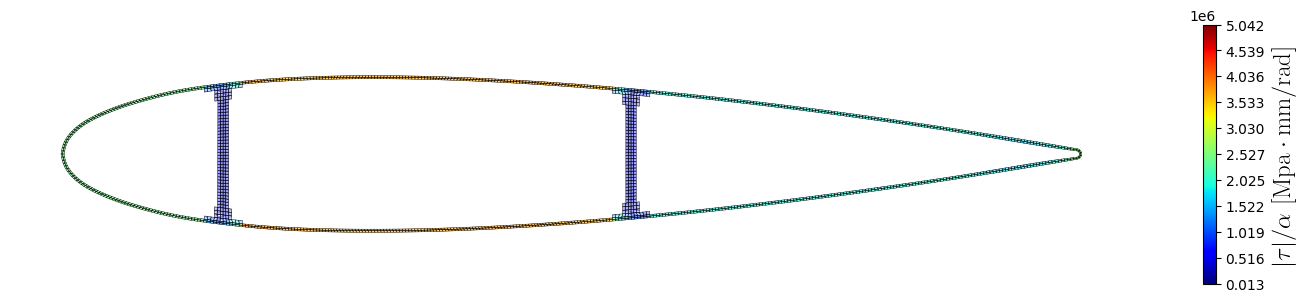

In [ ]:
## Shear stresses (Vector field)
fig2, ax2 = sec.plotShearStresses(degree=4, 
                                  width=.2,scale=.5, headlength=5, 
                                  figsize=(15,4), cbarKwargs=dict(shrink=.7))
fig2.tight_layout()
# Remove axis frame 
ax2.axis('off')
fig2

In [ ]:
# ## Shear stresses, component wise
# fig3, ax3 = sec.plotShearStresses(degree=4, mode='scalar',
#                                   figsize=(15,4),
#                                   cbarKwargs=dict(shrink=.5))
# fig3.tight_layout()
# # Remove axis frame 
# {ax.axis('off') for ax in ax3}

### Details

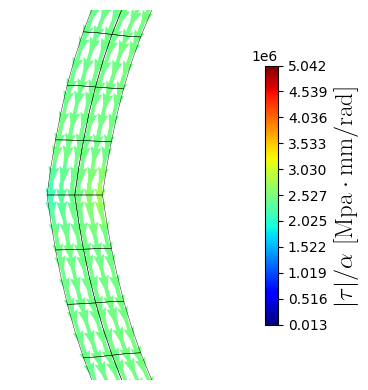

In [ ]:
plt.title('Detail (a)')
ax2.set_xlim([-2,8])
ax2.set_ylim([-10,10])
fig2

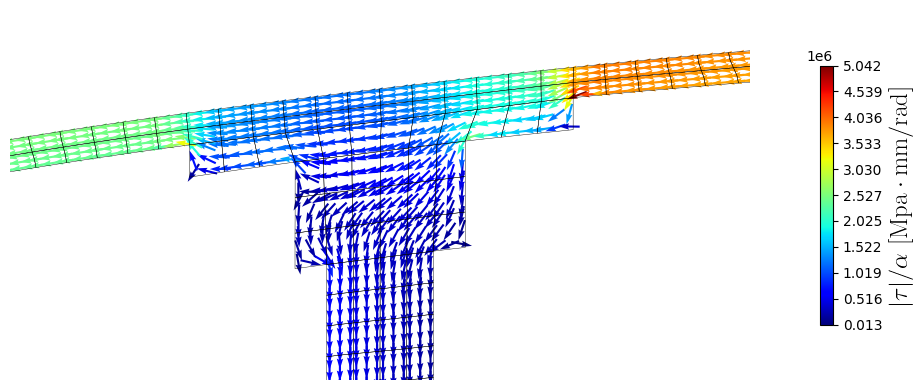

In [ ]:
plt.title('Detail (b)')
ax2.set_xlim([120,190])
ax2.set_ylim([40,75])
fig2

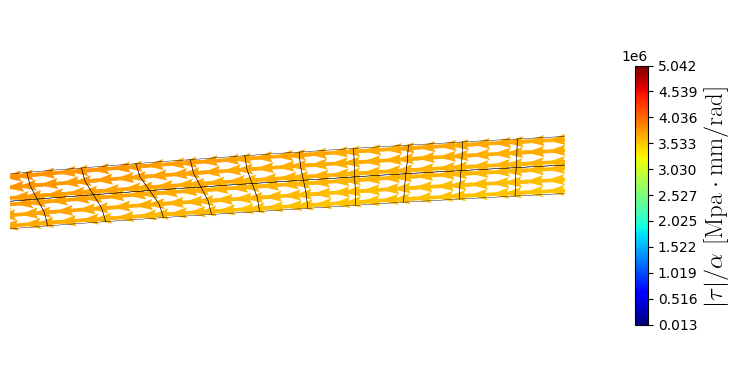

In [ ]:
plt.title('Detail (c)')
ax2.set_xlim([190,220])
ax2.set_ylim([60,80])
fig2

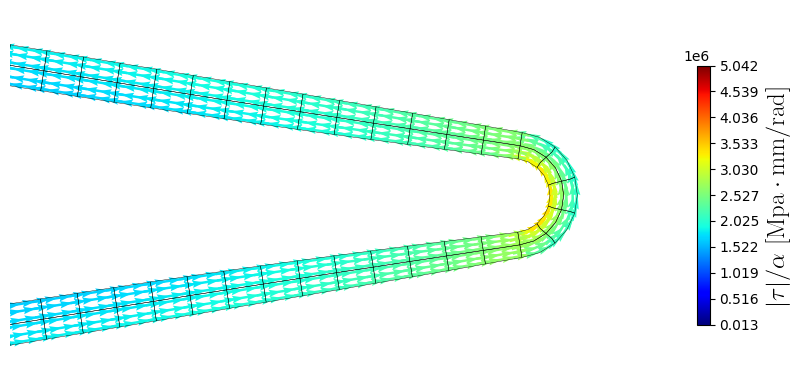

In [ ]:
plt.title('Detail (d)')
ax2.set_xlim([930,980])
ax2.set_ylim([-15,15])
fig2